# March Madness Mining!

### Step 1. Import neccessary packages for analytical work. 

In [426]:
pip install altair vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 2.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [271]:
import pandas as pd
import sqlite3 

# ELO Ratings

### Step 2. Connect to database to calculate ELO ratings and add to accessible dictionary within notebook. 

In [51]:
 # Path to the SQLite Database
db_path = '/Users/madelineprestegaard/Desktop/March_Madness_DB.db'

# Connect to the database
conn = sqlite3. connect(db_path)

# Read the game data for the 2024 season
query = """
SELECT DayNum, WTeamID, LTeamID, WScore, LScore
FROM MRegularSeasonDetailedResults_2024
ORDER BY DayNum
"""

games = pd.read_sql(query, conn)

# Initialize Elo ratings
# Assuming all teams start at 1500 and extracting unique team IDs from WTeamID and LTeamID
unique_teams = pd.concat([games['WTeamID'], games['LTeamID']]).unique()
elo_dict = {team: 1500 for team in unique_teams}

# Function to update Elo ratings after each game
def update_elo(winner_elo, loser_elo, K=20):
    expected_win = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
    new_winner_elo = winner_elo + K * (1 - expected_win)
    new_loser_elo = loser_elo + K * (0 - (1 - expected_win))
    return new_winner_elo, new_loser_elo

# Apply the Elo updates for each game
for index, game in games.iterrows():
    w_elo = elo_dict[game['WTeamID']]
    l_elo = elo_dict[game['LTeamID']]
    
    new_w_elo, new_l_elo = update_elo(w_elo, l_elo)
    
    elo_dict[game['WTeamID']] = new_w_elo
    elo_dict[game['LTeamID']] = new_l_elo

# Optionally, you can save or display the Elo ratings
print(elo_dict)

# Close the database connection
conn.close()

{1101: 1487.9019754721578, 1103: 1571.8331790426553, 1104: 1590.7860907725453, 1112: 1621.4380674154565, 1114: 1562.6149987642766, 1116: 1504.4591738851718, 1125: 1546.537843652675, 1130: 1533.2394553746296, 1132: 1517.4491901570773, 1133: 1574.0643040872253, 1139: 1520.7730937974438, 1140: 1599.004881520154, 1143: 1475.9756565771452, 1144: 1445.5205069599847, 1150: 1543.3698611800653, 1153: 1548.6433170918924, 1155: 1571.582974999725, 1158: 1642.1804931118863, 1159: 1596.5658919939303, 1160: 1606.4313948975441, 1161: 1586.9074881760505, 1163: 1709.0783660250652, 1165: 1585.198549333662, 1167: 1449.1629450967503, 1173: 1622.5689594871997, 1174: 1512.4663354133506, 1181: 1618.005573320739, 1182: 1608.7899917040088, 1191: 1473.9074156214474, 1192: 1458.8292029162553, 1196: 1606.7003343593635, 1200: 1460.4748529030294, 1203: 1459.2654283453123, 1206: 1546.2189452245398, 1210: 1484.1736851841235, 1213: 1654.5444962567867, 1222: 1697.6971879388293, 1224: 1499.0757955904821, 1228: 1645.30181

### Step 2b. Convert to dataframe. --> Do we still need that? 

In [52]:
# Convert to DataFrame for the next year
next_year_elo_df = pd.DataFrame(list(next_year_elo_dict.items()), columns=['TeamID', 'Elo'])
next_year_elo_df['Year'] = 2025  # Adjust the year accordingly

# Append to the original DataFrame
elo_df = elo_df.append(next_year_elo_df, ignore_index=True)

NameError: name 'next_year_elo_dict' is not defined

### Step 3. CREATE A NEW AND BETTER DATAFRAME OF ELO RATINGS-- NOT DICTIONARY

In [273]:
# Path to the SQLite database
db_path = '/Users/madelineprestegaard/Desktop/March_Madness_DB.db'
conn = sqlite3.connect(db_path)


def update_elo(winner_elo, loser_elo, K=20):
    expected_win = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
    new_winner_elo = winner_elo + K * (1 - expected_win)
    new_loser_elo = loser_elo - K * (1 - expected_win)
    return new_winner_elo, new_loser_elo

# Initialize DataFrame to store Elo ratings for all years
all_years_elo = pd.DataFrame(columns=['Year', 'TeamID', 'Elo'])

for year in range(2003, 2025):
    # Query the game data for each year
    table_name = f"MRegularSeasonDetailedResults_{year}"
    query = f"""
    SELECT DayNum, WTeamID, LTeamID, WScore, LScore
    FROM {table_name}
    ORDER BY DayNum
    """
    games = pd.read_sql(query, conn)

    # Initialize Elo ratings for teams involved that year
    unique_teams = pd.concat([games['WTeamID'], games['LTeamID']]).unique()
    elo_dict = {team: 1500 for team in unique_teams}  # All teams start at 1500 Elo

    # Calculate Elo ratings for that year
    for index, game in games.iterrows():
        w_elo = elo_dict[game['WTeamID']]
        l_elo = elo_dict[game['LTeamID']]

        new_w_elo, new_l_elo = update_elo(w_elo, l_elo)

        elo_dict[game['WTeamID']] = new_w_elo
        elo_dict[game['LTeamID']] = new_l_elo

    # Append the year's Elo ratings to the all_years_elo DataFrame
    year_elo_df = pd.DataFrame(list(elo_dict.items()), columns=['TeamID', 'Elo'])
    year_elo_df['Year'] = year
    all_years_elo = pd.concat([all_years_elo, year_elo_df], ignore_index=True)

# Query to get team names from MTeams
query_teams = """
SELECT TeamID, TeamName
FROM MTeams
"""
team_names = pd.read_sql(query_teams, conn)

# Merge the team names into the all_years_elo DataFrame
all_years_elo = pd.merge(all_years_elo, team_names, on='TeamID', how='left')

# Rearrange columns
all_years_elo = all_years_elo[['Year', 'TeamID', 'TeamName', 'Elo']]

# Close the database connection
conn.close()

# Display the DataFrame directly
display(all_years_elo)


,Year,TeamID,TeamName,Elo
0,2003,1272,Memphis,1630.639166
1,2003,1266,Marquette,1641.725400
2,2003,1296,N Illinois,1528.974972
3,2003,1400,Texas,1632.156124
4,2003,1458,Wisconsin,1614.125844
...,...,...,...,...
7612,2024,1223,Houston Chr,1352.720920
7613,2024,1322,Northwestern LA,1382.717946
7614,2024,1440,VMI,1315.147785
7615,2024,1178,Detroit,1299.461775


### Step 4. Plot yearly ELO ratings for a specific Team --> Uconn

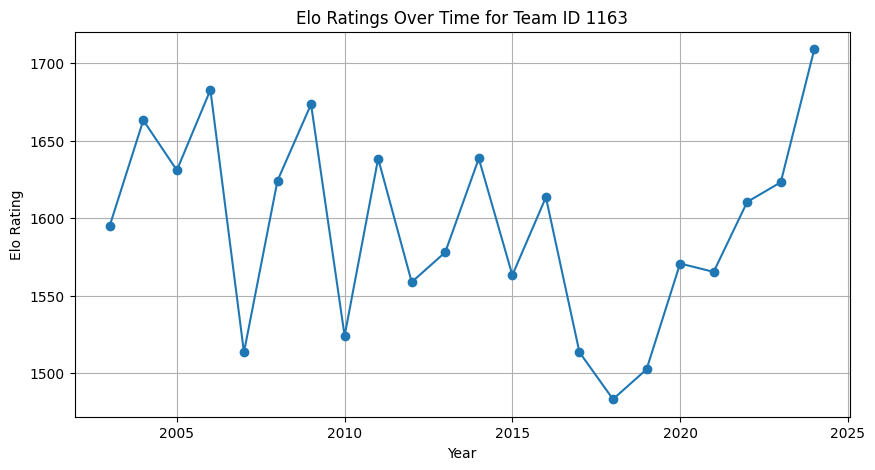

In [274]:
import matplotlib.pyplot as plt

# Filter the DataFrame for Team ID 1163
team_1163_elo = all_years_elo[all_years_elo['TeamID'] == 1163]
# Ensure the Year column is sorted, just in case
team_1163_elo = team_1163_elo.sort_values(by='Year')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(team_1163_elo['Year'], team_1163_elo['Elo'], marker='o', linestyle='-')
plt.title('Elo Ratings Over Time for Team ID 1163')
plt.xlabel('Year')
plt.ylabel('Elo Rating')
plt.grid(True)
plt.show()

### Step 5. Review the top 10 ELO Ratings of 2024

In [275]:
# Filter the DataFrame for the year 2024 and sort by Elo in descending order
top_10_elo_2024 = all_years_elo[all_years_elo['Year'] == 2024].sort_values(by='Elo', ascending=False).head(10)
# Display the top 10 Elo values for 2024
print(top_10_elo_2024)

      Year TeamID        TeamName          Elo
7276  2024   1163     Connecticut  1709.078366
7291  2024   1222         Houston  1697.697188
7328  2024   1345          Purdue  1682.463618
7294  2024   1235         Iowa St  1667.421915
7295  2024   1241   James Madison  1665.157187
7411  2024   1120          Auburn  1658.235629
7383  2024   1179           Drake  1655.205017
7315  2024   1314  North Carolina  1655.096933
7290  2024   1213    Grand Canyon  1654.544496
7304  2024   1270      McNeese St  1649.482933


### Step 6. Review the top 10 ELO Ratings of 2023

In [276]:
top_10_elo_2023 = all_years_elo[all_years_elo['Year'] == 2023]. sort_values(by = 'Elo', ascending = False).head(10)
print(top_10_elo_2023)

      Year TeamID        TeamName          Elo
6927  2023   1222         Houston  1696.863103
6894  2023   1104         Alabama  1685.232438
7112  2023   1194     FL Atlantic  1683.421876
6997  2023   1417            UCLA  1678.425306
6909  2023   1158  Col Charleston  1675.898692
6940  2023   1266       Marquette  1674.185792
6924  2023   1211         Gonzaga  1672.078517
7022  2023   1345          Purdue  1667.381065
6972  2023   1361    San Diego St  1662.787375
7126  2023   1331    Oral Roberts  1658.960677


# Pythagrean Expectation

## Step 7. Calculating Pythagorean Expectation from the SQL database

In [364]:
import sqlite3

# Connect to your SQLite database
conn = sqlite3.connect('/Users/madelineprestegaard/Desktop/March_Madness_DB.db')

# Query to retrieve points scored and allowed for each team across all seasons
query = """
SELECT WTeamID AS TeamID, WScore AS PointsScored, LScore AS PointsAllowed, Season FROM MRegularSeasonDetailedResults
UNION ALL
SELECT LTeamID AS TeamID, LScore AS PointsScored, WScore AS PointsAllowed, Season FROM MRegularSeasonDetailedResults
"""
df_scores = pd.read_sql(query, conn)

# Aggregate points scored and allowed by each team across all seasons
df_aggregated = df_scores.groupby(['TeamID', 'Season']).agg(
    TotalPointsScored=pd.NamedAgg(column='PointsScored', aggfunc='sum'),
    TotalPointsAllowed=pd.NamedAgg(column='PointsAllowed', aggfunc='sum')
).reset_index()

# Calculate the Pythagorean expectation for each team across all seasons
df_aggregated['PythagoreanExpectation'] = (df_aggregated['TotalPointsScored'] ** 13.91) / (
    (df_aggregated['TotalPointsScored'] ** 13.91) + (df_aggregated['TotalPointsAllowed'] ** 13.91)
)

# Query to get team names from MTeams
team_names_query = """
SELECT TeamID, TeamName
FROM MTeams
"""
team_names = pd.read_sql(team_names_query, conn)

# Merge the team names into the df_aggregated DataFrame
df_aggregated = pd.merge(df_aggregated, team_names, on='TeamID', how='left')

# Close the database connection
conn.close()

# Create the DataFrame with the required columns
MNCAATourneySeedsWithPythagExpect = df_aggregated.rename(columns={'TeamID': 'TeamID',
                                                                  'TeamName': 'TeamName',
                                                                  'PythagoreanExpectation': 'PythgExpect'})

# Add the 'Seed' column and set it to None initially
MNCAATourneySeedsWithPythagExpect['Seed'] = None

# Reorder the columns to match the desired format
MNCAATourneySeedsWithPythagExpect = MNCAATourneySeedsWithPythagExpect[['Season', 'Seed', 'TeamID', 'TeamName', 'PythgExpect']]

# Display the DataFrame
print(MNCAATourneySeedsWithPythagExpect)
print(MNCAATourneySeedsWithPythagExpect)

      Season  Seed  TeamID         TeamName  PythgExpect
0       2014  None    1101      Abilene Chr     0.045249
1       2015  None    1101      Abilene Chr     0.092916
2       2016  None    1101      Abilene Chr     0.227800
3       2017  None    1101      Abilene Chr     0.280347
4       2018  None    1101      Abilene Chr     0.397345
...      ...   ...     ...              ...          ...
7614    2023  None    1476        Stonehill     0.295325
7615    2024  None    1476        Stonehill     0.058232
7616    2023  None    1477  TX A&M Commerce     0.335316
7617    2024  None    1477  TX A&M Commerce     0.140958
7618    2024  None    1478         Le Moyne     0.425943

[7619 rows x 5 columns]


## Step 8. List of top ELO Values against Pythagorean to compare

| TeamID | TeamName        | Elo         |
|--------|-----------------|-------------|
| 1163   | Connecticut     | 1709.078366 |
| 1222   | Houston         | 1697.697188 |
| 1345   | Purdue          | 1682.463618 |
| 1235   | Iowa St         | 1667.421915 |
| 1241   | James Madison   | 1665.157187 |
| 1120   | Auburn          | 1658.235629 |
| 1179   | Drake           | 1655.205017 |
| 1314   | North Carolina  | 1655.096933 |
| 1213   | Grand Canyon    | 1654.544496 |
| 1270   | McNeese St      | 1649.482933 |

/n

| TeamID | TeamName       | PythagoreanExpectation |
|--------|----------------|------------------------|
| 1222   | Houston        | 0.969357               |
| 1163   | Connecticut    | 0.963318               |
| 1235   | Iowa St        | 0.948356               |
| 1388   | St Mary's CA   | 0.944915               |
| 1270   | McNeese St     | 0.943958               |
| 1120   | Auburn         | 0.943791               |
| 1112   | Arizona        | 0.939060               |
| 1211   | Gonzaga        | 0.931247               |
| 1241   | James Madison  | 0.921808               |
| 1345   | Purdue         | 0.917230               |

# Uploading MNCAATourneySlots and MNCAATourneySeeds as Dataframes rather than calling the db

In [286]:
# Define the path to your SQLite database
db_path = '/Users/madelineprestegaard/Desktop/March_Madness_DB.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Load the MNCAATourneySlots table for seasons between 2003 and 2024
query_slots = """
SELECT *
FROM MNCAATourneySlots
WHERE Season BETWEEN 2003 AND 2024
"""
MNCAATourneySlots = pd.read_sql(query_slots, conn)

# Load the MNCAATourneySeeds table for the same range of seasons
query_seeds = """
SELECT *
FROM MNCAATourneySeeds
WHERE Season BETWEEN 2003 AND 2024
"""
MNCAATourneySeeds = pd.read_sql(query_seeds, conn)

# Close the database connection
conn.close()
print(MNCAATourneySeeds.head())

print(MNCAATourneySlots.head())

print(all_years_elo.head())

# Rename 'Year' to 'Season' in all_years_elo DataFrame
all_years_elo.rename(columns={'Year': 'Season'}, inplace=True)

# Now perform the merge with the corrected column name
MNCAATourneySeedsWithEloRating = pd.merge(MNCAATourneySeeds, all_years_elo, on=['Season', 'TeamID'], how='inner')

# Print the merged DataFrame to verify it worked
print(MNCAATourneySeedsWithEloRating.head())

   Season Seed  TeamID
0    2003  W01    1328
1    2003  W02    1448
2    2003  W03    1393
3    2003  W04    1257
4    2003  W05    1280
   Season  Slot StrongSeed WeakSeed
0    2003  R1W1        W01      W16
1    2003  R1W2        W02      W15
2    2003  R1W3        W03      W14
3    2003  R1W4        W04      W13
4    2003  R1W5        W05      W12
   Year TeamID    TeamName          Elo
0  2003   1272     Memphis  1630.639166
1  2003   1266   Marquette  1641.725400
2  2003   1296  N Illinois  1528.974972
3  2003   1400       Texas  1632.156124
4  2003   1458   Wisconsin  1614.125844
  Season Seed TeamID        TeamName          Elo
0   2003  W01   1328        Oklahoma  1657.024864
1   2003  W02   1448     Wake Forest  1642.484029
2   2003  W03   1393        Syracuse  1648.425684
3   2003  W04   1257      Louisville  1633.874529
4   2003  W05   1280  Mississippi St  1599.762696


# Merging for one large seeded ELO df MNCAATourneySeedsWithEloRating 

In [299]:
# Merge the data frames with explicit column mapping
MNCAATourneySeedsWithEloRating = pd.merge(
    MNCAATourneySeeds,
    all_years_elo.rename(columns={'Year': 'Season'}),  # Renaming 'Year' to 'Season' for a consistent merge
    on=['Season', 'TeamID'],
    how='inner'
)
print(MNCAATourneySeedsWithEloRating.head())

  Season Seed TeamID        TeamName          Elo
0   2003  W01   1328        Oklahoma  1657.024864
1   2003  W02   1448     Wake Forest  1642.484029
2   2003  W03   1393        Syracuse  1648.425684
3   2003  W04   1257      Louisville  1633.874529
4   2003  W05   1280  Mississippi St  1599.762696


## Elo Ratings for just 2024

In [300]:
# Filter the merged DataFrame for the 2024 season
MNCAATourneySeedsWithEloRating_2024 = MNCAATourneySeedsWithEloRating[MNCAATourneySeedsWithEloRating['Season'] == 2024]

# Print the first few rows to check the results
print(MNCAATourneySeedsWithEloRating_2024.head(25))

     Season Seed TeamID        TeamName          Elo
1336   2024  W01   1163     Connecticut  1709.078366
1337   2024  W02   1235         Iowa St  1667.421915
1338   2024  W03   1228        Illinois  1645.301820
1339   2024  W04   1120          Auburn  1658.235629
1340   2024  W05   1361    San Diego St  1595.552448
1341   2024  W06   1140             BYU  1599.004882
1342   2024  W07   1450   Washington St  1609.465632
1343   2024  W08   1194     FL Atlantic  1617.946074
1344   2024  W09   1321    Northwestern  1572.022330
1345   2024  W10   1179           Drake  1655.205017
1346   2024  W11   1182        Duquesne  1608.789992
1347   2024  W12   1412             UAB  1592.697970
1348   2024  W13   1463            Yale  1588.888201
1349   2024  W14   1287     Morehead St  1591.977796
1350   2024  W15   1355     S Dakota St  1561.071386
1351   2024  W16   1391         Stetson  1545.859788
1352   2024  X01   1314  North Carolina  1655.096933
1353   2024  X02   1112         Arizona  1621.

## Tourney Slots for just 2024

In [301]:
MNCAATourneySlots_2024 = MNCAATourneySlots[MNCAATourneySlots['Season'] == 2024]
print(MNCAATourneySlots_2024.head(56))

      Season  Slot StrongSeed WeakSeed
1316    2024  R1W1        W01      W16
1317    2024  R1W2        W02      W15
1318    2024  R1W3        W03      W14
1319    2024  R1W4        W04      W13
1320    2024  R1W5        W05      W12
1321    2024  R1W6        W06      W11
1322    2024  R1W7        W07      W10
1323    2024  R1W8        W08      W09
1324    2024  R1X1        X01      X16
1325    2024  R1X2        X02      X15
1326    2024  R1X3        X03      X14
1327    2024  R1X4        X04      X13
1328    2024  R1X5        X05      X12
1329    2024  R1X6        X06      X11
1330    2024  R1X7        X07      X10
1331    2024  R1X8        X08      X09
1332    2024  R1Y1        Y01      Y16
1333    2024  R1Y2        Y02      Y15
1334    2024  R1Y3        Y03      Y14
1335    2024  R1Y4        Y04      Y13
1336    2024  R1Y5        Y05      Y12
1337    2024  R1Y6        Y06      Y11
1338    2024  R1Y7        Y07      Y10
1339    2024  R1Y8        Y08      Y09
1340    2024  R1Z1       

## Add The Round columns to MNCAATourneySeedsWithEloRating_YEAR

In [302]:
for i in range(1, 7):
    MNCAATourneySeedsWithEloRating_2024[f'Round_{i}'] = None

# Print the DataFrame to verify the new columns have been added
print(MNCAATourneySeedsWithEloRating_2024)


     Season Seed TeamID       TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163    Connecticut  1709.078366    None    None    None   
1337   2024  W02   1235        Iowa St  1667.421915    None    None    None   
1338   2024  W03   1228       Illinois  1645.301820    None    None    None   
1339   2024  W04   1120         Auburn  1658.235629    None    None    None   
1340   2024  W05   1361   San Diego St  1595.552448    None    None    None   
...     ...  ...    ...            ...          ...     ...     ...     ...   
1399   2024  Z12   1241  James Madison  1665.157187    None    None    None   
1400   2024  Z13   1436        Vermont  1644.941511    None    None    None   
1401   2024  Z14   1324        Oakland  1590.077150    None    None    None   
1402   2024  Z15   1443            WKU  1543.195370    None    None    None   
1403   2024  Z16   1255       Longwood  1528.532980    None    None    None   

     Round_4 Round_5 Round_6  
1336    None    None

/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3062097571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MNCAATourneySeedsWithEloRating_2024[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3062097571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MNCAATourneySeedsWithEloRating_2024[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3062097571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

## HANDLE PLAY IN GAMES FIRST --> may be manually

In [290]:
# Play-in games are in rows 64-67 (assuming zero-based index, these are rows 63-66)
play_in_games = MNCAATourneySlots_2024.iloc[63:67]

# Iterate through each play-in game
for index, game in play_in_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == strong_seed]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == weak_seed]['Elo'].values[0]
    print(strong_elo, weak_elo)

    # Determine winner based on Elo
    if strong_elo > weak_elo:
        winner_seed = strong_seed
        winner_team_id = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == strong_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)
    else:
        winner_seed = weak_seed
        winner_team_id = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == weak_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)

    # Update the main seed entry for the slot to reflect the winner of the play-in game


IndexError: index 0 is out of bounds for axis 0 with size 0

## Manually Update original MNCAATourneySeedsWithEloRating_YEAR 'Seeds' for the winners as determined above

In [303]:
# Identify rows where the 'Seed' is 'Z10b' and update them to 'Z10'
MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Z10b', 'Seed'] = 'Z10'
MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Y10b', 'Seed'] = 'Y10'
MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Y16a', 'Seed'] = 'Y16'
MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'X16a', 'Seed'] = 'X16'

# Print the updated rows to verify the change
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Z10'])
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Y10'])
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'Y16'])
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == 'X16'])

     Season Seed TeamID  TeamName          Elo Round_1 Round_2 Round_3  \
1397   2024  Z10   1160  Colorado  1606.431395    None    None    None   

     Round_4 Round_5 Round_6  
1397    None    None    None  
     Season Seed TeamID  TeamName          Elo Round_1 Round_2 Round_3  \
1379   2024  Y10   1438  Virginia  1590.736744    None    None    None   

     Round_4 Round_5 Round_6  
1379    None    None    None  
     Season Seed TeamID   TeamName        Elo Round_1 Round_2 Round_3 Round_4  \
1385   2024  Y16   1212  Grambling  1529.8805    None    None    None    None   

     Round_5 Round_6  
1385    None    None  
     Season Seed TeamID TeamName          Elo Round_1 Round_2 Round_3 Round_4  \
1367   2024  X16   1224   Howard  1499.075796    None    None    None    None   

     Round_5 Round_6  
1367    None    None  


# STAGE 1: ELO Ratings as match deciders
## First Round Games

In [304]:
first_round_games = MNCAATourneySlots_2024.iloc[0:32]

# Iterate through each game in the first round
for index, game in first_round_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    try:
        strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Seed'] == weak_seed]['Elo'].values[0]

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
        else:
            winner_seed = weak_seed

        # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
        MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['Seed'] == winner_seed, 'Round_1'] = game['Slot']
    except IndexError:
        print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")

# Print updated seeds to verify Round 1 results
print(MNCAATourneySeedsWithEloRating_2024.head(25))

     Season Seed TeamID        TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163     Connecticut  1709.078366    R1W1    None    None   
1337   2024  W02   1235         Iowa St  1667.421915    R1W2    None    None   
1338   2024  W03   1228        Illinois  1645.301820    R1W3    None    None   
1339   2024  W04   1120          Auburn  1658.235629    R1W4    None    None   
1340   2024  W05   1361    San Diego St  1595.552448    R1W5    None    None   
1341   2024  W06   1140             BYU  1599.004882    None    None    None   
1342   2024  W07   1450   Washington St  1609.465632    None    None    None   
1343   2024  W08   1194     FL Atlantic  1617.946074    R1W8    None    None   
1344   2024  W09   1321    Northwestern  1572.022330    None    None    None   
1345   2024  W10   1179           Drake  1655.205017    R1W7    None    None   
1346   2024  W11   1182        Duquesne  1608.789992    R1W6    None    None   
1347   2024  W12   1412             UAB 

## Second Round Games

In [305]:
# Assuming Round 2 games are the next set of rows after Round 1
round_2_games = MNCAATourneySlots_2024.iloc[32:48]  # Adjust this range based on your actual data

# Iterate through each game in Round 2
for index, game in round_2_games.iterrows():
    # Get the Round 1 winners for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

    # Fetch the Elo ratings for the winners from Round 1
    strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']

# Verify updates for Round 2
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_2'].notnull()])

     Season Seed TeamID        TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163     Connecticut  1709.078366    R1W1    R2W1    None   
1337   2024  W02   1235         Iowa St  1667.421915    R1W2    R2W2    None   
1338   2024  W03   1228        Illinois  1645.301820    R1W3    R2W3    None   
1339   2024  W04   1120          Auburn  1658.235629    R1W4    R2W4    None   
1352   2024  X01   1314  North Carolina  1655.096933    R1X1    R2X1    None   
1361   2024  X10   1305          Nevada  1636.114789    R1X7    R2X2    None   
1362   2024  X11   1307      New Mexico  1617.644724    R1X6    R2X3    None   
1363   2024  X12   1213    Grand Canyon  1654.544496    R1X5    R2X4    None   
1369   2024  Y01   1345          Purdue  1682.463618    R1Y1    R2Y1    None   
1370   2024  Y02   1397       Tennessee  1630.695690    R1Y2    R2Y2    None   
1374   2024  Y06   1376  South Carolina  1639.299657    R1Y6    R2Y3    None   
1381   2024  Y12   1270      McNeese St 

## Third Round Games

In [306]:
# Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
# Adjust the row selection as per your dataset
round_3_games = MNCAATourneySlots_2024.iloc[48:56]  # This is an example range; adjust as necessary

# Iterate through each game in Round 3
for index, game in round_3_games.iterrows():
    # Get the Round 2 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

# Print the updated DataFrame to verify Round 3 results
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_3'].notnull()])

     Season Seed TeamID        TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163     Connecticut  1709.078366    R1W1    R2W1    R3W1   
1337   2024  W02   1235         Iowa St  1667.421915    R1W2    R2W2    R3W2   
1352   2024  X01   1314  North Carolina  1655.096933    R1X1    R2X1    R3X1   
1361   2024  X10   1305          Nevada  1636.114789    R1X7    R2X2    R3X2   
1369   2024  Y01   1345          Purdue  1682.463618    R1Y1    R2Y1    R3Y1   
1374   2024  Y06   1376  South Carolina  1639.299657    R1Y6    R2Y3    R3Y2   
1387   2024  Z01   1222         Houston  1697.697188    R1Z1    R2Z1    R3Z1   
1388   2024  Z02   1266       Marquette  1624.822836    R1Z2    R2Z2    R3Z2   

     Round_4 Round_5 Round_6  
1336    None    None    None  
1337    None    None    None  
1352    None    None    None  
1361    None    None    None  
1369    None    None    None  
1374    None    None    None  
1387    None    None    None  
1388    None    None    None  


## Fourth Round Games

In [307]:
# Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
round_4_games = MNCAATourneySlots_2024.iloc[56:60]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 4
for index, game in round_4_games.iterrows():
    # Get the Round 3 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Fetch the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
    # Print the updated DataFrame to verify Round 4 results
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_4'].notnull()])

     Season Seed TeamID        TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163     Connecticut  1709.078366    R1W1    R2W1    R3W1   
1352   2024  X01   1314  North Carolina  1655.096933    R1X1    R2X1    R3X1   
1369   2024  Y01   1345          Purdue  1682.463618    R1Y1    R2Y1    R3Y1   
1387   2024  Z01   1222         Houston  1697.697188    R1Z1    R2Z1    R3Z1   

     Round_4 Round_5 Round_6  
1336    R4W1    None    None  
1352    R4X1    None    None  
1369    R4Y1    None    None  
1387    R4Z1    None    None  


# Fifth Round Games

In [308]:
# Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
round_5_games = MNCAATourneySlots_2024.iloc[60:62]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 5
for index, game in round_5_games.iterrows():
    # Get the Round 4 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

# Print the updated DataFrame to verify Round 5 results
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_5'].notnull()])

     Season Seed TeamID     TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163  Connecticut  1709.078366    R1W1    R2W1    R3W1   
1387   2024  Z01   1222      Houston  1697.697188    R1Z1    R2Z1    R3Z1   

     Round_4 Round_5 Round_6  
1336    R4W1    R5WX    None  
1387    R4Z1    R5YZ    None  


## Championship Round!

In [309]:
# Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
championship_game = MNCAATourneySlots_2024.iloc[62]  # Adjust this index if necessary

# Get the Round 5 winners' team IDs for both the strong and weak seeds
strong_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
weak_seed_winner = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

# Retrieve the Elo ratings for these winners
strong_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == strong_seed_winner]['Elo'].values[0]
weak_elo = MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['TeamID'] == weak_seed_winner]['Elo'].values[0]

# Determine the champion based on Elo ratings
if strong_elo > weak_elo:
    champion_team_id = strong_seed_winner
else:
    champion_team_id = weak_seed_winner

# Update the 'Round_6' column for the champion to reflect their tournament win
MNCAATourneySeedsWithEloRating_2024.loc[MNCAATourneySeedsWithEloRating_2024['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']

# Print the updated DataFrame to verify the championship results
print(MNCAATourneySeedsWithEloRating_2024[MNCAATourneySeedsWithEloRating_2024['Round_6'].notnull()])

     Season Seed TeamID     TeamName          Elo Round_1 Round_2 Round_3  \
1336   2024  W01   1163  Connecticut  1709.078366    R1W1    R2W1    R3W1   

     Round_4 Round_5 Round_6  
1336    R4W1    R5WX    R6CH  


# Downloading it as a .CSV File to Desktop folder. 

In [311]:
MNCAATourneySeedsWithEloRating_2024.to_csv('/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_2024.csv', index=False)
print("Complete! File has been downloaded to [MM_TournamentResults] on your Desktop.")

Complete! File has been downloaded to [MM_TournamentResults] on your Desktop.


### Final

## Let's Try Condensing it down to run in one code block for the 2023 season. 
### Expect for the play-in Games (W16ab, X16ab, Y11ab, Z11ab)

In [312]:
MNCAATourneySeedsWithEloRating_2023 = MNCAATourneySeedsWithEloRating[MNCAATourneySeedsWithEloRating['Season'] == 2023]

for i in range(1, 7):
    MNCAATourneySeedsWithEloRating_2023[f'Round_{i}'] = None

# Print the DataFrame to verify the new columns have been added

print(MNCAATourneySeedsWithEloRating_2023.head(10))
MNCAATourneySlots_2023 = MNCAATourneySlots[MNCAATourneySlots['Season'] == 2023]
print(MNCAATourneySlots_2023.head(10))


     Season Seed TeamID     TeamName          Elo Round_1 Round_2 Round_3  \
1268   2023  W01   1345       Purdue  1667.381065    None    None    None   
1269   2023  W02   1266    Marquette  1674.185792    None    None    None   
1270   2023  W03   1243    Kansas St  1600.061233    None    None    None   
1271   2023  W04   1397    Tennessee  1593.003385    None    None    None   
1272   2023  W05   1181         Duke  1651.126253    None    None    None   
1273   2023  W06   1246     Kentucky  1587.626150    None    None    None   
1274   2023  W07   1277  Michigan St  1561.386937    None    None    None   
1275   2023  W08   1272      Memphis  1645.305507    None    None    None   
1276   2023  W09   1194  FL Atlantic  1683.421876    None    None    None   
1277   2023  W10   1425          USC  1590.894425    None    None    None   

     Round_4 Round_5 Round_6  
1268    None    None    None  
1269    None    None    None  
1270    None    None    None  
1271    None    None    None

/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/693243583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MNCAATourneySeedsWithEloRating_2023[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/693243583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MNCAATourneySeedsWithEloRating_2023[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/693243583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [313]:
# Example code to handle play-in games and update seed entries
def update_play_in_games(slots_df, seeds_df):
    # Play-in games are in rows 64-67 (assuming zero-based index, these are rows 63-66)
    play_in_games = slots_df.iloc[63:67]

    # Iterate through each play-in game
    for index, game in play_in_games.iterrows():
        strong_seed = game['StrongSeed']
        weak_seed = game['WeakSeed']

        # Get the Elo ratings for both seeds
        strong_elo = seeds_df[seeds_df['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = seeds_df[seeds_df['Seed'] == weak_seed]['Elo'].values[0]
        print(strong_elo, weak_elo)

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
            loser_seed = weak_seed
        else:
            winner_seed = weak_seed
            loser_seed = strong_seed

        winner_team_id = seeds_df[seeds_df['Seed'] == winner_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)

        # Update the main seed entry for the slot to reflect the winner of the play-in game
        seed_slot = game['Slot']
        seeds_df.loc[seeds_df['Seed'] == seed_slot, 'TeamID'] = winner_team_id
        
        # Update the seed name by truncating the last character if it's a letter (e.g., 'X16b' to 'X16')
        if winner_seed[-1].isalpha():  # Check if last character is a letter
            new_seed = winner_seed[:-1]  # Remove the last character
            seeds_df.loc[seeds_df['Seed'] == winner_seed, 'Seed'] = new_seed

        # Set the slot seed to regular format for future rounds
        seeds_df.loc[seeds_df['Seed'] == seed_slot, 'Seed'] = new_seed

    return seeds_df

# Example usage
if __name__ == "__main__":
    # Assuming MNCAATourneySeedsWithEloRating_2023 and MNCAATourneySlots_2023 are loaded DataFrames
    seeds_df_updated = update_play_in_games(MNCAATourneySlots_2023, MNCAATourneySeedsWithEloRating_2023)
    print(seeds_df_updated.head())

1494.177241595588 1448.6911860338446
this team won:  1192
1508.482261976814 1563.2976195530082
this team won:  1394
1569.9645572330844 1577.9899252054033
this team won:  1338
1567.0577755437203 1578.270986527146
this team won:  1305
     Season Seed TeamID   TeamName          Elo Round_1 Round_2 Round_3  \
1268   2023  W01   1345     Purdue  1667.381065    None    None    None   
1269   2023  W02   1266  Marquette  1674.185792    None    None    None   
1270   2023  W03   1243  Kansas St  1600.061233    None    None    None   
1271   2023  W04   1397  Tennessee  1593.003385    None    None    None   
1272   2023  W05   1181       Duke  1651.126253    None    None    None   

     Round_4 Round_5 Round_6  
1268    None    None    None  
1269    None    None    None  
1270    None    None    None  
1271    None    None    None  
1272    None    None    None  


In [314]:
#Play in games first: 
# Play-in games are in rows 64-67 (assuming zero-based index, these are rows 63-66)
play_in_games = MNCAATourneySlots_2023.iloc[63:67]

# Iterate through each play-in game
for index, game in play_in_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == strong_seed]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == weak_seed]['Elo'].values[0]
    print(strong_elo, weak_elo)

    # Determine winner based on Elo
    if strong_elo > weak_elo:
        winner_seed = strong_seed
        winner_team_id = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == strong_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)
    else:
        winner_seed = weak_seed
        winner_team_id = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == weak_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)

    # Update the main seed entry for the slot to reflect the winner of the play-in game
##NEED UPDATE HERE WHERE THE THE TEAMID IS RELATED BACK TO THE GIVEN SEED (Such as X16b) and Truncated to remove the extra letter into the regular seeding format!! Like Below

# Identify rows where the 'Seed' is 'Z10b' and update them to 'Z10'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'X16b', 'Seed'] = 'X16'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'W16a', 'Seed'] = 'W16'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Y11b', 'Seed'] = 'Y11'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Z11b', 'Seed'] = 'Z11'

IndexError: index 0 is out of bounds for axis 0 with size 0

In [315]:
# Identify rows where the 'Seed' is 'Z10b' and update them to 'Z10'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'X16b', 'Seed'] = 'X16'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'W16a', 'Seed'] = 'W16'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Y11b', 'Seed'] = 'Y11'
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Z11b', 'Seed'] = 'Z11'

In [316]:
first_round_games = MNCAATourneySlots_2023.iloc[0:32]

# Iterate through each game in the first round
for index, game in first_round_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    try:
        strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Seed'] == weak_seed]['Elo'].values[0]

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
        else:
            winner_seed = weak_seed

        # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
        MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == winner_seed, 'Round_1'] = game['Slot']
    except IndexError:
        print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")



# Assuming Round 2 games are the next set of rows after Round 1

round_2_games = MNCAATourneySlots_2023.iloc[32:48]  # Adjust this range based on your actual data

# Iterate through each game in Round 2
for index, game in round_2_games.iterrows():
    # Get the Round 1 winners for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

    # Fetch the Elo ratings for the winners from Round 1
    strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']


# Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
# Adjust the row selection as per your dataset
round_3_games = MNCAATourneySlots_2023.iloc[48:56]  # This is an example range; adjust as necessary

# Iterate through each game in Round 3
for index, game in round_3_games.iterrows():
    # Get the Round 2 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

# Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
round_4_games = MNCAATourneySlots_2023.iloc[56:60]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 4
for index, game in round_4_games.iterrows():
    # Get the Round 3 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Fetch the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
    # Print the updated DataFrame to verify Round 4 results


# Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
round_5_games = MNCAATourneySlots_2023.iloc[60:62]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 5
for index, game in round_5_games.iterrows():
    # Get the Round 4 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
    MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

# Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
championship_game = MNCAATourneySlots_2023.iloc[62]  # Adjust this index if necessary

# Get the Round 5 winners' team IDs for both the strong and weak seeds
strong_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
weak_seed_winner = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

# Retrieve the Elo ratings for these winners
strong_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == strong_seed_winner]['Elo'].values[0]
weak_elo = MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['TeamID'] == weak_seed_winner]['Elo'].values[0]

# Determine the champion based on Elo ratings
if strong_elo > weak_elo:
    champion_team_id = strong_seed_winner
else:
    champion_team_id = weak_seed_winner

# Update the 'Round_6' column for the champion to reflect their tournament win
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']
# Print the updated DataFrame to verify the championship results
#Print updated seeds to verify Round 1 results
#print(MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_6'].notnull()])

print(MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_6'].notnull()])
# Save the DataFrame to a CSV file on desktop

MNCAATourneySeedsWithEloRating_2023.to_csv('/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_2023.csv', index=False)


     Season Seed TeamID TeamName          Elo Round_1 Round_2 Round_3 Round_4  \
1302   2023  Y01   1222  Houston  1696.863103    R1Y1    R2Y1    R3Y1    R4Y1   

     Round_5 Round_6  
1302    R5YZ    R6CH  


## Trying more condensed and easy to set code:

In [328]:
def get_input_year():
    while True:
        user_input = input("Pick a season from 2003 to 2024: ")
        try:
            year = int(user_input)
            if 2003 <= year <= 2024:
                return year
            else:
                print("Please pick an integer between 2003 and 2024.")
        except ValueError:
            print("That's not an integer. Please enter an integer.")

year = get_input_year()

active_seeds_df = MNCAATourneySeedsWithEloRating[MNCAATourneySeedsWithEloRating['Season'] == year]
active_slots_df = MNCAATourneySlots[MNCAATourneySlots['Season'] == year]

# Adding new columns initialized to None
for i in range(1, 7):
    active_seeds_df[f'Round_{i}'] = None

# Print the DataFrame to verify the new columns have been added
print(active_seeds_df.head(10))
print(active_slots_df.head(10))


# MUST HANDLE PLAY IN GAMES FIRST!: 
# Identify rows where the 'Seed' is '####' and update them to '###'

```python
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'X16b', 'Seed'] = 'X16' 
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'W16a', 'Seed'] = 'W16' 
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Y11b', 'Seed'] = 'Y11' 
MNCAATourneySeedsWithEloRating_2023.loc[MNCAATourneySeedsWithEloRating_2023['Seed'] == 'Z11b', 'Seed'] = 'Z11'


In [336]:
# Get Play in information: 
# Example code to handle play-in games and update seed entries
def update_play_in_games(active_slots_df, active_seeds_df):
    # Play-in games are in rows 64-67 (assuming zero-based index, these are rows 63-66)
    play_in_games = active_slots_df.iloc[63:67]

    # Iterate through each play-in game
    for index, game in play_in_games.iterrows():
        strong_seed = game['StrongSeed']
        weak_seed = game['WeakSeed']

        # Get the Elo ratings for both seeds
        strong_elo = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['Elo'].values[0]
        print(strong_elo, weak_elo)

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
            loser_seed = weak_seed
        else:
            winner_seed = weak_seed
            loser_seed = strong_seed

        winner_team_id = active_seeds_df[active_seeds_df['Seed'] == winner_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)

        # Update the main seed entry for the slot to reflect the winner of the play-in game
        seed_slot = game['Slot']
        active_seeds_df.loc[active_seeds_df['Seed'] == seed_slot, 'TeamID'] = winner_team_id
        
        # Update the seed name by truncating the last character if it's a letter (e.g., 'X16b' to 'X16')
        if winner_seed[-1].isalpha():  # Check if last character is a letter
            new_seed = winner_seed[:-1]  # Remove the last character
            active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Seed'] = new_seed

        # Set the slot seed to regular format for future rounds
        active_seeds_df.loc[active_seeds_df['Seed'] == seed_slot, 'Seed'] = new_seed

    return active_seeds_df

update_play_in_games(active_slots_df, active_seeds_df)


1631.3295581354075 1605.5687507351
this team won:  1125
1513.4319889952233 1492.9012071123527
this team won:  1295
1587.5063709421083 1554.9275818917977
this team won:  1113
1548.3905439142247 1566.6301882777234
this team won:  1341


,Season,Seed,TeamID,TeamName,Elo,Round_1,Round_2,Round_3,Round_4,Round_5,Round_6
1064,2019,W01,1181,Duke,1690.780907,None,None,None,None,None,None
1065,2019,W02,1277,Michigan St,1675.991730,None,None,None,None,None,None
1066,2019,W03,1261,LSU,1654.333196,None,None,None,None,None,None
1067,2019,W04,1439,Virginia Tech,1617.037047,None,None,None,None,None,None
1068,2019,W05,1280,Mississippi St,1597.997665,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1127,2019,Z12,1332,Oregon,1596.865061,None,None,None,None,None,None
1128,2019,Z13,1414,UC Irvine,1653.998048,None,None,None,None,None,None
1129,2019,Z14,1330,Old Dominion,1626.227914,None,None,None,None,None,None
1130,2019,Z15,1159,Colgate,1599.051870,None,None,None,None,None,None


In [338]:
first_round_games = active_slots_df.iloc[0:32]

# Iterate through each game in the first round
for index, game in first_round_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    try:
        strong_elo = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['Elo'].values[0]

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
        else:
            winner_seed = weak_seed

        # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Round_1'] = game['Slot']
    except IndexError:
        print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")

# Assuming Round 2 games are the next set of rows after Round 1

round_2_games = active_slots_df.iloc[32:48]  # Adjust this range based on your actual data

# Iterate through each game in Round 2
for index, game in round_2_games.iterrows():
    # Get the Round 1 winners for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

    # Fetch the Elo ratings for the winners from Round 1
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo 
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']


# Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
# Adjust the row selection as per your dataset
round_3_games = active_slots_df.iloc[48:56]  # This is an example range; adjust as necessary

# Iterate through each game in Round 3
for index, game in round_3_games.iterrows():
    # Get the Round 2 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

# Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
round_4_games = active_slots_df.iloc[56:60]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 4
for index, game in round_4_games.iterrows():
    # Get the Round 3 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Fetch the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
    # Print the updated DataFrame to verify Round 4 results


# Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
round_5_games = active_slots_df.iloc[60:62]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 5
for index, game in round_5_games.iterrows():
    # Get the Round 4 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

# Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
championship_game = active_slots_df.iloc[62]  # Adjust this index if necessary

# Get the Round 5 winners' team IDs for both the strong and weak seeds
strong_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
weak_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

# Retrieve the Elo ratings for these winners
strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

# Determine the champion based on Elo ratings
if strong_elo > weak_elo:
    champion_team_id = strong_seed_winner
else:
    champion_team_id = weak_seed_winner

# Update the 'Round_6' column for the champion to reflect their tournament win
active_seeds_df.loc[active_seeds_df['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']
# Print the updated DataFrame to verify the championship results
#Print updated seeds to verify Round 1 results
#print(MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_6'].notnull()])

print(active_seeds_df[active_seeds_df['Round_6'].notnull()])
# Save the DataFrame to a CSV file on desktop


file_path = f"/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_{year}.csv"
active_seeds_df.to_csv(file_path, index=False)

     Season Seed TeamID TeamName          Elo Round_1 Round_2 Round_3 Round_4  \
1102   2019  Y03   1222  Houston  1699.782333    R1Y3    R2Y3    R3Y2    R4Y1   

     Round_5 Round_6  
1102    R5YZ    R6CH  


# **MOMENT OF TRUTH**

In [339]:
year = get_input_year()

active_seeds_df = MNCAATourneySeedsWithEloRating[MNCAATourneySeedsWithEloRating['Season'] == year]
active_slots_df = MNCAATourneySlots[MNCAATourneySlots['Season'] == year]

# Adding new columns initialized to None
for i in range(1, 7):
    active_seeds_df[f'Round_{i}'] = None

# Print the DataFrame to verify the new columns have been added
#print(active_seeds_df.head(10))
#print(active_slots_df.head(10))

# Get Play in information: 

update_play_in_games(active_slots_df, active_seeds_df)

first_round_games = active_slots_df.iloc[0:32]

# Iterate through each game in the first round
for index, game in first_round_games.iterrows():
    strong_seed = game['StrongSeed']
    weak_seed = game['WeakSeed']

    # Get the Elo ratings for both seeds
    try:
        strong_elo = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['Elo'].values[0]

        # Determine winner based on Elo
        if strong_elo > weak_elo:
            winner_seed = strong_seed
        else:
            winner_seed = weak_seed

        # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Round_1'] = game['Slot']
    except IndexError:
        print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")

# Assuming Round 2 games are the next set of rows after Round 1

round_2_games = active_slots_df.iloc[32:48]  # Adjust this range based on your actual data

# Iterate through each game in Round 2
for index, game in round_2_games.iterrows():
    # Get the Round 1 winners for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

    # Fetch the Elo ratings for the winners from Round 1
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo 
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']


# Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
# Adjust the row selection as per your dataset
round_3_games = active_slots_df.iloc[48:56]  # This is an example range; adjust as necessary

# Iterate through each game in Round 3
for index, game in round_3_games.iterrows():
    # Get the Round 2 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

# Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
round_4_games = active_slots_df.iloc[56:60]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 4
for index, game in round_4_games.iterrows():
    # Get the Round 3 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Fetch the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
    # Print the updated DataFrame to verify Round 4 results


# Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
round_5_games = active_slots_df.iloc[60:62]  # Adjust this range according to your dataset's structure

# Iterate through each game in Round 5
for index, game in round_5_games.iterrows():
    # Get the Round 4 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the winner based on Elo ratings
    if strong_elo > weak_elo:
        winner_team_id = strong_seed_winner
    else:
        winner_team_id = weak_seed_winner

    # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
    active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

# Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
championship_game = active_slots_df.iloc[62]  # Adjust this index if necessary

# Get the Round 5 winners' team IDs for both the strong and weak seeds
strong_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
weak_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

# Retrieve the Elo ratings for these winners
strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

# Determine the champion based on Elo ratings
if strong_elo > weak_elo:
    champion_team_id = strong_seed_winner
else:
    champion_team_id = weak_seed_winner

# Update the 'Round_6' column for the champion to reflect their tournament win
active_seeds_df.loc[active_seeds_df['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']
# Print the updated DataFrame to verify the championship results
#Print updated seeds to verify Round 1 results
#print(MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_6'].notnull()])

print(active_seeds_df[active_seeds_df['Round_6'].notnull()])
# Save the DataFrame to a CSV file on desktop


file_path = f"/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_{year}.csv"
active_seeds_df.to_csv(file_path, index=False)

1521.613246613104 1484.2324519874855
this team won:  1411
   Season Seed TeamID  TeamName          Elo Round_1 Round_2 Round_3 Round_4  \
33   2003  Y01   1246  Kentucky  1710.924438    R1Y1    R2Y1    R3Y1    R4Y1   

   Round_5 Round_6  
33    R5YZ    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3018358889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3018358889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/3018358889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [340]:
def run_elo_bracket():
    year = get_input_year()

    active_seeds_df = MNCAATourneySeedsWithEloRating[MNCAATourneySeedsWithEloRating['Season'] == year]
    active_slots_df = MNCAATourneySlots[MNCAATourneySlots['Season'] == year]

    # Adding new columns initialized to None
    for i in range(1, 7):
        active_seeds_df[f'Round_{i}'] = None

    # Print the DataFrame to verify the new columns have been added
    #print(active_seeds_df.head(10))
    #print(active_slots_df.head(10))

    # Get Play in information: 

    update_play_in_games(active_slots_df, active_seeds_df)

    first_round_games = active_slots_df.iloc[0:32]

    # Iterate through each game in the first round
    for index, game in first_round_games.iterrows():
        strong_seed = game['StrongSeed']
        weak_seed = game['WeakSeed']

        # Get the Elo ratings for both seeds
        try:
            strong_elo = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['Elo'].values[0]
            weak_elo = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['Elo'].values[0]

            # Determine winner based on Elo
            if strong_elo > weak_elo:
                winner_seed = strong_seed
            else:
                winner_seed = weak_seed

            # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
            active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Round_1'] = game['Slot']
        except IndexError:
            print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")

    # Assuming Round 2 games are the next set of rows after Round 1

    round_2_games = active_slots_df.iloc[32:48]  # Adjust this range based on your actual data

    # Iterate through each game in Round 2
    for index, game in round_2_games.iterrows():
        # Get the Round 1 winners for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

        # Fetch the Elo ratings for the winners from Round 1
        strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

        # Determine the winner based on Elo 
        if strong_elo > weak_elo:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']


    # Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
    # Adjust the row selection as per your dataset
    round_3_games = active_slots_df.iloc[48:56]  # This is an example range; adjust as necessary

    # Iterate through each game in Round 3
    for index, game in round_3_games.iterrows():
        # Get the Round 2 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Retrieve the Elo ratings for these winners
        strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

        # Determine the winner based on Elo ratings
        if strong_elo > weak_elo:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

    # Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
    round_4_games = active_slots_df.iloc[56:60]  # Adjust this range according to your dataset's structure

    # Iterate through each game in Round 4
    for index, game in round_4_games.iterrows():
        # Get the Round 3 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Fetch the Elo ratings for these winners
        strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

        # Determine the winner based on Elo ratings
        if strong_elo > weak_elo:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
        # Print the updated DataFrame to verify Round 4 results


    # Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
    round_5_games = active_slots_df.iloc[60:62]  # Adjust this range according to your dataset's structure

    # Iterate through each game in Round 5
    for index, game in round_5_games.iterrows():
        # Get the Round 4 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Retrieve the Elo ratings for these winners
        strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
        weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

        # Determine the winner based on Elo ratings
        if strong_elo > weak_elo:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

    # Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
    championship_game = active_slots_df.iloc[62]  # Adjust this index if necessary

    # Get the Round 5 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Elo ratings for these winners
    strong_elo = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['Elo'].values[0]
    weak_elo = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['Elo'].values[0]

    # Determine the champion based on Elo ratings
    if strong_elo > weak_elo:
        champion_team_id = strong_seed_winner
    else:
        champion_team_id = weak_seed_winner

    # Update the 'Round_6' column for the champion to reflect their tournament win
    active_seeds_df.loc[active_seeds_df['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']
    # Print the updated DataFrame to verify the championship results
    #Print updated seeds to verify Round 1 results
    #print(MNCAATourneySeedsWithEloRating_2023[MNCAATourneySeedsWithEloRating_2023['Round_6'].notnull()])

    print(active_seeds_df[active_seeds_df['Round_6'].notnull()])
    # Save the DataFrame to a CSV file on desktop


    file_path = f"/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_{year}.csv"
    active_seeds_df.to_csv(file_path, index=False)

In [361]:
run_elo_bracket()

/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/2530615801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/2530615801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/2530615801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

1553.4107487591525 1608.6106625972777
this team won:  1461
1588.6953796484509 1554.4934439789633
this team won:  1323
1534.4113365696414 1539.3981784523537
this team won:  1411
1591.3402101575869 1555.2818317749668
this team won:  1136
     Season Seed TeamID TeamName          Elo Round_1 Round_2 Round_3 Round_4  \
1251   2022  Z01   1112  Arizona  1703.669004    R1Z1    R2Z1    R3Z1    R4Z1   

     Round_5 Round_6  
1251    R5YZ    R6CH  


# PYTHAGOREAN FORMULATION

In [399]:
# Connect to your SQLite database
conn = sqlite3.connect('/Users/madelineprestegaard/Desktop/March_Madness_DB.db')

# Query to retrieve points scored and allowed for each team across all seasons
query = """
SELECT WTeamID AS TeamID, WScore AS PointsScored, LScore AS PointsAllowed, Season FROM MRegularSeasonDetailedResults
UNION ALL
SELECT LTeamID AS TeamID, LScore AS PointsScored, WScore AS PointsAllowed, Season FROM MRegularSeasonDetailedResults
"""
df_scores = pd.read_sql(query, conn)

# Aggregate points scored and allowed by each team across all seasons
df_aggregated = df_scores.groupby(['TeamID', 'Season']).agg(
    TotalPointsScored=pd.NamedAgg(column='PointsScored', aggfunc='sum'),
    TotalPointsAllowed=pd.NamedAgg(column='PointsAllowed', aggfunc='sum')
).reset_index()

# Calculate the Pythagorean expectation for each team across all seasons
df_aggregated['PythagoreanExpectation'] = (df_aggregated['TotalPointsScored'] ** 13.91) / (
    (df_aggregated['TotalPointsScored'] ** 13.91) + (df_aggregated['TotalPointsAllowed'] ** 13.91)
)

# Query to get team names from MTeams
team_names_query = """
SELECT TeamID, TeamName
FROM MTeams
"""
team_names = pd.read_sql(team_names_query, conn)

# Merge the team names into the df_aggregated DataFrame
df_aggregated = pd.merge(df_aggregated, team_names, on='TeamID', how='left')

# Close the database connection
conn.close()

# Create the DataFrame with the required columns
MNCAATourneyPythagExpect = df_aggregated.rename(columns={'TeamID': 'TeamID',
                                                                  'TeamName': 'TeamName',
                                                                  'PythagoreanExpectation': 'PythgExpect'})



# Reorder the columns to match the desired format
MNCAATourneyPythagExpect = MNCAATourneyPythagExpect[['Season', 'TeamID', 'TeamName', 'PythgExpect']]

# Display the DataFrame
print(MNCAATourneyPythagExpect)
print(MNCAATourneySeeds)

      Season  TeamID         TeamName  PythgExpect
0       2014    1101      Abilene Chr     0.045249
1       2015    1101      Abilene Chr     0.092916
2       2016    1101      Abilene Chr     0.227800
3       2017    1101      Abilene Chr     0.280347
4       2018    1101      Abilene Chr     0.397345
...      ...     ...              ...          ...
7614    2023    1476        Stonehill     0.295325
7615    2024    1476        Stonehill     0.058232
7616    2023    1477  TX A&M Commerce     0.335316
7617    2024    1477  TX A&M Commerce     0.140958
7618    2024    1478         Le Moyne     0.425943

[7619 rows x 4 columns]
      Season Seed  TeamID
0       2003  W01    1328
1       2003  W02    1448
2       2003  W03    1393
3       2003  W04    1257
4       2003  W05    1280
...      ...  ...     ...
1399    2024  Z12    1241
1400    2024  Z13    1436
1401    2024  Z14    1324
1402    2024  Z15    1443
1403    2024  Z16    1255

[1404 rows x 3 columns]


In [406]:
# Assuming MNCAATourneyPythagExpect and MNCAATourneySeeds are already defined as shown

# Merge the MNCAATourneyPythagExpect DataFrame with the MNCAATourneySeeds DataFrame
MNCAATourneyPythagWithSeeds = pd.merge(
    MNCAATourneyPythagExpect,
    MNCAATourneySeeds[['Season', 'TeamID', 'Seed']],  # Select only necessary columns for the merge
    on=['Season', 'TeamID'],
    how='inner'  # Ensures only teams that appear in both datasets are included
)

# Display the first few rows of the merged DataFrame to verify the resul

# Reorder the columns of MNCAATourneyPythagWithSeeds DataFrame
MNCAATourneyPythagWithSeeds = MNCAATourneyPythagWithSeeds[['Season', 'Seed', 'TeamID', 'TeamName', 'PythgExpect']]

# Display the first few rows of the rearranged DataFrame to verify the result
print(MNCAATourneyPythagWithSeeds.head())

   Season Seed  TeamID     TeamName  PythgExpect
0    2019  Y15    1101  Abilene Chr     0.800825
1    2021  W14    1101  Abilene Chr     0.950089
2    2004  W11    1102    Air Force     0.921196
3    2006  Z13    1102    Air Force     0.891657
4    2009  X13    1103        Akron     0.785303


## Merge Dataframes and add Rounds

In [411]:
def update_play_in_games2(active_slots_df, active_seeds_df):
    # Play-in games are in rows 64-67 (assuming zero-based index, these are rows 63-66)
    play_in_games = active_slots_df.iloc[63:67]

    # Iterate through each play-in game
    for index, game in play_in_games.iterrows():
        strong_seed = game['StrongSeed']
        weak_seed = game['WeakSeed']

        # Get the Elo ratings for both seeds
        strong_pyth = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['PythgExpect'].values[0]
        weak_pyth = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['PythgExpect'].values[0]
        print(strong_pyth, weak_pyth)

        # Determine winner based on Elo
        if strong_pyth > weak_pyth:
            winner_seed = strong_seed
            loser_seed = weak_seed
        else:
            winner_seed = weak_seed
            loser_seed = strong_seed

        winner_team_id = active_seeds_df[active_seeds_df['Seed'] == winner_seed]['TeamID'].values[0]
        print("this team won: ", winner_team_id)

        # Update the main seed entry for the slot to reflect the winner of the play-in game
        seed_slot = game['Slot']
        active_seeds_df.loc[active_seeds_df['Seed'] == seed_slot, 'TeamID'] = winner_team_id
        
        # Update the seed name by truncating the last character if it's a letter (e.g., 'X16b' to 'X16')
        if winner_seed[-1].isalpha():  # Check if last character is a letter
            new_seed = winner_seed[:-1]  # Remove the last character
            active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Seed'] = new_seed

        # Set the slot seed to regular format for future rounds
        active_seeds_df.loc[active_seeds_df['Seed'] == seed_slot, 'Seed'] = new_seed

    return active_seeds_df



In [412]:
def run_Pythagorean_bracket2():
    year = get_input_year()

    active_seeds_df = MNCAATourneyPythagWithSeeds[MNCAATourneyPythagWithSeeds['Season'] == year]
    active_slots_df = MNCAATourneySlots[MNCAATourneySlots['Season'] == year]

    # Adding new columns initialized to None
    for i in range(1, 7):
        active_seeds_df[f'Round_{i}'] = None

    # Print the DataFrame to verify the new columns have been added
    # print(active_seeds_df.head(10))
    # print(active_slots_df.head(10))

    # Get Play in information:
    update_play_in_games2(active_slots_df, active_seeds_df)

    first_round_games = active_slots_df.iloc[0:32]

    # Iterate through each game in the first round
    for index, game in first_round_games.iterrows():
        strong_seed = game['StrongSeed']
        weak_seed = game['WeakSeed']

        # Get the Pythagorean Expectation for both seeds
        try:
            strong_pyth = active_seeds_df[active_seeds_df['Seed'] == strong_seed]['PythgExpect'].values[0]
            weak_pyth = active_seeds_df[active_seeds_df['Seed'] == weak_seed]['PythgExpect'].values[0]

            # Determine winner based on Pythagorean Expectation
            if strong_pyth > weak_pyth:
                winner_seed = strong_seed
            else:
                winner_seed = weak_seed

            # Update the 'Round_1' column for the winner to reflect their advancement in the tournament
            active_seeds_df.loc[active_seeds_df['Seed'] == winner_seed, 'Round_1'] = game['Slot']
        except IndexError:
            print(f"Missing data for matchup between {strong_seed} and {weak_seed}. Check seed data.")

    # Assuming Round 2 games are the next set of rows after Round 1

    round_2_games = active_slots_df.iloc[32:48]  # Adjust this range based on your actual data

    # Iterate through each game in Round 2
    for index, game in round_2_games.iterrows():
        # Get the Round 1 winners for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['StrongSeed']]['TeamID'].values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_1'] == game['WeakSeed']]['TeamID'].values[0]

        # Fetch the Pythagorean Expectation for the winners from Round 1
        strong_pyth = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['PythgExpect'].values[0]
        weak_pyth = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['PythgExpect'].values[0]

        # Determine the winner based on Pythagorean Expectation 
        if strong_pyth > weak_pyth:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_2' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_2'] = game['Slot']

    # Assuming Round 3 games are specified in your slots DataFrame, typically the next set of rows after Round 2
    # Adjust the row selection as per your dataset
    round_3_games = active_slots_df.iloc[48:56]  # This is an example range; adjust as necessary

    # Iterate through each game in Round 3
    for index, game in round_3_games.iterrows():
        # Get the Round 2 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_2'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Retrieve the Pythagorean Expectation for these winners
        strong_pyth = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['PythgExpect'].values[0]
        weak_pyth = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['PythgExpect'].values[0]

        # Determine the winner based on Pythagorean Expectation
        if strong_pyth > weak_pyth:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_3' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_3'] = game['Slot']

    # Assuming Round 4 games are specified in your slots DataFrame, typically following Round 3
    round_4_games = active_slots_df.iloc[56:60]  # Adjust this range according to your dataset's structure

    # Iterate through each game in Round 4
    for index, game in round_4_games.iterrows():
        # Get the Round 3 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_3'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Fetch the Pythagorean Expectation for these winners
        strong_pyth = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['PythgExpect'].values[0]
        weak_pyth = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['PythgExpect'].values[0]

        # Determine the winner based on Pythagorean Expectation
        if strong_pyth > weak_pyth:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_4' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_4'] = game['Slot']
        # Print the updated DataFrame to verify Round 4 results


    # Assuming Round 5 games are specified in your slots DataFrame, typically the next set of rows after Round 4
    round_5_games = active_slots_df.iloc[60:62]  # Adjust this range according to your dataset's structure

    # Iterate through each game in Round 5
    for index, game in round_5_games.iterrows():
        # Get the Round 4 winners' team IDs for both the strong and weak seeds
        strong_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['StrongSeed']]['TeamID'].dropna().values[0]
        weak_seed_winner = active_seeds_df[active_seeds_df['Round_4'] == game['WeakSeed']]['TeamID'].dropna().values[0]

        # Retrieve the Pythagorean Expectation for these winners
        strong_pyth = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['PythgExpect'].values[0]
        weak_pyth = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['PythgExpect'].values[0]

        # Determine the winner based on Pythagorean Expectation
        if strong_pyth > weak_pyth:
            winner_team_id = strong_seed_winner
        else:
            winner_team_id = weak_seed_winner

        # Update the 'Round_5' column for the winner to reflect their advancement in the tournament
        active_seeds_df.loc[active_seeds_df['TeamID'] == winner_team_id, 'Round_5'] = game['Slot']

    # Assuming the Championship game is specified in your slots DataFrame, typically the row following Round 5
    championship_game = active_slots_df.iloc[62]  # Adjust this index if necessary

    # Get the Round 5 winners' team IDs for both the strong and weak seeds
    strong_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['StrongSeed']]['TeamID'].dropna().values[0]
    weak_seed_winner = active_seeds_df[active_seeds_df['Round_5'] == championship_game['WeakSeed']]['TeamID'].dropna().values[0]

    # Retrieve the Pythagorean Expectation for these winners
    strong_pyth = active_seeds_df[active_seeds_df['TeamID'] == strong_seed_winner]['PythgExpect'].values[0]
    weak_pyth = active_seeds_df[active_seeds_df['TeamID'] == weak_seed_winner]['PythgExpect'].values[0]

    # Determine the champion based on Pythagorean Expectation
    if strong_pyth > weak_pyth:
        champion_team_id = strong_seed_winner
    else:
        champion_team_id = weak_seed_winner

    # Update the 'Round_6' column for the champion to reflect their tournament win
    active_seeds_df.loc[active_seeds_df['TeamID'] == champion_team_id, 'Round_6'] = championship_game['Slot']
    # Print the updated DataFrame to verify the championship results
    # Print updated seeds to verify Round 1 results
   

    print(active_seeds_df[active_seeds_df['Round_6'].notnull()])
    # Save the DataFrame to a CSV file on desktop

    file_path = f"/Users/madelineprestegaard/Desktop/MM_TournamentResults/Final_Tournament_Results_{year}_Pythg.csv"
    active_seeds_df.to_csv(file_path, index=False)

In [415]:
run_Pythagorean_bracket2()

0.41203805544631816 0.6148935625427587
this team won:  1250
      Season Seed  TeamID        TeamName  PythgExpect Round_1 Round_2  \
1023    2004  Y01    1386  St Joseph's PA     0.963306    R1Y1    R2Y1   

     Round_3 Round_4 Round_5 Round_6  
1023    R3Y1    R4Y1    R5YZ    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [418]:
run_Pythagorean_bracket2()


0.6763302358722405 0.7331508282104833
this team won:  1425
0.4865563928478406 0.565191767976739
this team won:  1309
0.8716189911542427 0.5251326179381998
this team won:  1300
0.7233120064052856 0.6949264393457627
this team won:  1243
     Season Seed  TeamID TeamName  PythgExpect Round_1 Round_2 Round_3  \
376    2017  X01    1211  Gonzaga     0.989131    R1X1    R2X1    R3X1   

    Round_4 Round_5 Round_6  
376    R4X1    R5WX    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [417]:
run_Pythagorean_bracket2()
run_Pythagorean_bracket2()
run_Pythagorean_bracket2()
run_Pythagorean_bracket2()
run_Pythagorean_bracket2()
run_Pythagorean_bracket2()

/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0.7843525808070001 0.7278958766203367
this team won:  1382
0.49450870761510396 0.6071484128045356
this team won:  1347
0.8078878529351113 0.6529306371342346
this team won:  1113
0.48410455319409706 0.408745782655557
this team won:  1300
     Season Seed  TeamID    TeamName  PythgExpect Round_1 Round_2 Round_3  \
171    2018  Y02    1153  Cincinnati      0.97547    R1Y2    R2Y2    R3Y2   

    Round_4 Round_5 Round_6  
171    R4Y1    R5YZ    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0.8914025238560185 0.6688071709561869
this team won:  1125
0.43129982493246166 0.4914503004737828
this team won:  1300
0.7060231589505442 0.6220415861218204
this team won:  1113
0.6050903016335798 0.5986646762661756
this team won:  1192
     Season Seed  TeamID TeamName  PythgExpect Round_1 Round_2 Round_3  \
378    2019  X01    1211  Gonzaga     0.987062    R1X1    R2X1    R3X1   

    Round_4 Round_5 Round_6  
378    R4X1    R5WX    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0.4249112785950494 0.7017588475306379
this team won:  1417
0.5771339893277028 0.6623399746488842
this team won:  1411
0.9009177219073815 0.6268444114063056
this team won:  1179
0.49575147618898263 0.7053842708281617
this team won:  1313
     Season Seed  TeamID TeamName  PythgExpect Round_1 Round_2 Round_3  \
379    2021  X01    1211  Gonzaga      0.98194    R1X1    R2X1    R3X1   

    Round_4 Round_5 Round_6  
379    R4X1    R5WX    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0.7545864580569829 0.7776763306706982
this team won:  1461
0.7314678074852863 0.6073761650935232
this team won:  1323
0.6268399425099664 0.6837508591831382
this team won:  1411
0.6386716545456161 0.6620006302259842
this team won:  1460
     Season Seed  TeamID TeamName  PythgExpect Round_1 Round_2 Round_3  \
380    2022  X01    1211  Gonzaga     0.983907    R1X1    R2X1    R3X1   

    Round_4 Round_5 Round_6  
380    R4X1    R5WX    R6CH  


/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

0.5142715939577344 0.2725240441747043
this team won:  1192
0.47824528416220885 0.7278585999642767
this team won:  1394
0.7458631096015909 0.7446130983258715
this team won:  1280
0.6289356131070657 0.7116814239084353
this team won:  1305
     Season Seed  TeamID TeamName  PythgExpect Round_1 Round_2 Round_3  \
405    2023  Y01    1222  Houston     0.981024    R1Y1    R2Y1    R3Y1   

    Round_4 Round_5 Round_6  
405    R4Y1    R5YZ    R6CH  
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
That's not an integer. Please enter an integer.
0.4724802699812512 0.4255627515399226
this team won:  1224
0.7643546248701809 0.7117544631822832
this team won:  1161
0.31

/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_seeds_df[f'Round_{i}'] = None
/var/folders/zc/9ks95q_s0pq03w8cqz_xssd40000gn/T/ipykernel_5717/1061514019.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<table>
  <thead>
    <tr>
      <th>TeamID</th>
      <th>Wins</th>
      <th>Games</th>
      <th>WinPercentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1194</td>
      <td>4</td>
      <td>5</td>
      <td>0.8</td>
    </tr>
    <tr>
      <td>1163</td>
      <td>35</td>
      <td>44</td>
      <td>0.795454545454545</td>
    </tr>
    <tr>
      <td>1314</td>
      <td>50</td>
      <td>64</td>
      <td>0.78125</td>
    </tr>
    <tr>
      <td>1247</td>
      <td>3</td>
      <td>4</td>
      <td>0.75</td>
    </tr>
    <tr>
      <td>1242</td>
      <td>51</td>
      <td>69</td>
      <td>0.739130434782609</td>
    </tr>
    <tr>
      <td>1196</td>
      <td>33</td>
      <td>45</td>
      <td>0.733333333333333</td>
    </tr>
    <tr>
      <td>1181</td>
      <td>44</td>
      <td>61</td>
      <td>0.721311475409836</td>
    </tr>
    <tr>
      <td>1246</td>
      <td>41</td>
      <td>57</td>
      <td>0.719298245614035</td>
    </tr>
    <tr>
      <td>1437</td>
      <td>34</td>
      <td>48</td>
      <td>0.708333333333333</td>
    </tr>
  </tbody>
</table>

In [425]:
bracketology_predictions = {
    "Season": [2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003],
    "Correct_Prediction_Elo": [33, 24, 28, 28, 35, 31, 36, 37, 38, 39, 29, 35, 36, 41, 45, 45, 42, 35, 41, 35, 30],
    "Elo_Percentage": [0.52, 0.38, 0.44, 0.44, 0.56, 0.49, 0.57, 0.59, 0.60, 0.62, 0.46, 0.56, 0.57, 0.65, 0.71, 0.71, 0.67, 0.56, 0.65, 0.56, 0.48],
    "Correct_Prediction_Pythg": [31, 32, 28, 28,  37, 29, 36, 35, 36, 36, 30, 37, 30, 39, 39, 44, 42, 37, 42, 30, 30],
    "Pythg_Percentage": [0.49, 0.51, 0.44, 0.44, 0.59, 0.46, 0.57, 0.56, 0.57, 0.57, 0.48, 0.59, 0.48, 0.62, 0.62, 0.70, 0.67, 0.59, 0.67, 0.48, 0.48]
}

bracketology_predictions_df = pd.DataFrame(bracketology_predictions)

bracketology_predictions_df.head(10)

,Season,Correct_Prediction_Elo,Elo_Percentage,Correct_Prediction_Pythg,Pythg_Percentage
0,2024,33,0.52,31,0.49
1,2023,24,0.38,32,0.51
2,2022,28,0.44,28,0.44
3,2021,28,0.44,28,0.44
4,2019,35,0.56,37,0.59
5,2018,31,0.49,29,0.46
6,2017,36,0.57,36,0.57
7,2016,37,0.59,35,0.56
8,2015,38,0.60,36,0.57
9,2014,39,0.62,36,0.57


In [427]:
import altair as alt

In [438]:
# Melting the DataFrame to format for Altair plotting
df_melted = bracketology_predictions_df.melt(id_vars=['Season'], value_vars=['Elo_Percentage', 'Pythg_Percentage'], 
                                             var_name='Method', value_name='Percentage')

# Creating the grouped bar chart
chart = alt.Chart(df_melted).mark_bar().encode(
    x=alt.X('Season:N', title='Season'),  # Nominal data type for Season
    y=alt.Y('Percentage:Q', title='Win Percentage'),
    color='Method:N',
    column=alt.Column('Method:N', title='Prediction Method', header=alt.Header(labelOrient='bottom')),
    # To group by season and method side by side within each season
    column=alt.Column('Method:N', header=alt.Header(title='Method')),
    x=alt.X('Season:N', title='Season'),
    x=alt.X('Method:N', title=None, axis=alt.Axis(labels=False)),  # Hide method labels on the axis
    tooltip=['Season', 'Method', 'Percentage']
).properties(
    width=150,  # Width of each individual bar
    height=300
)

chart.display()

SyntaxError: keyword argument repeated: x (3275029483.py, line 13)

In [439]:
df_2 = {
    "Season": [2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003],
    "Elo_Percentage": [0.52, 0.38, 0.44, 0.44, 0.56, 0.49, 0.57, 0.59, 0.60, 0.62, 0.46, 0.56, 0.57, 0.65, 0.71, 0.71, 0.67, 0.56, 0.65, 0.56, 0.48],
    "Pythg_Percentage": [0.49, 0.51, 0.44, 0.44, 0.59, 0.46, 0.57, 0.56, 0.57, 0.57, 0.48, 0.59, 0.48, 0.62, 0.62, 0.70, 0.67, 0.59, 0.67, 0.48, 0.48]
}

df_2 = pd.DataFrame(df_2)

df_2.head(10)

,Season,Elo_Percentage,Pythg_Percentage
0,2024,0.52,0.49
1,2023,0.38,0.51
2,2022,0.44,0.44
3,2021,0.44,0.44
4,2019,0.56,0.59
5,2018,0.49,0.46
6,2017,0.57,0.57
7,2016,0.59,0.56
8,2015,0.60,0.57
9,2014,0.62,0.57


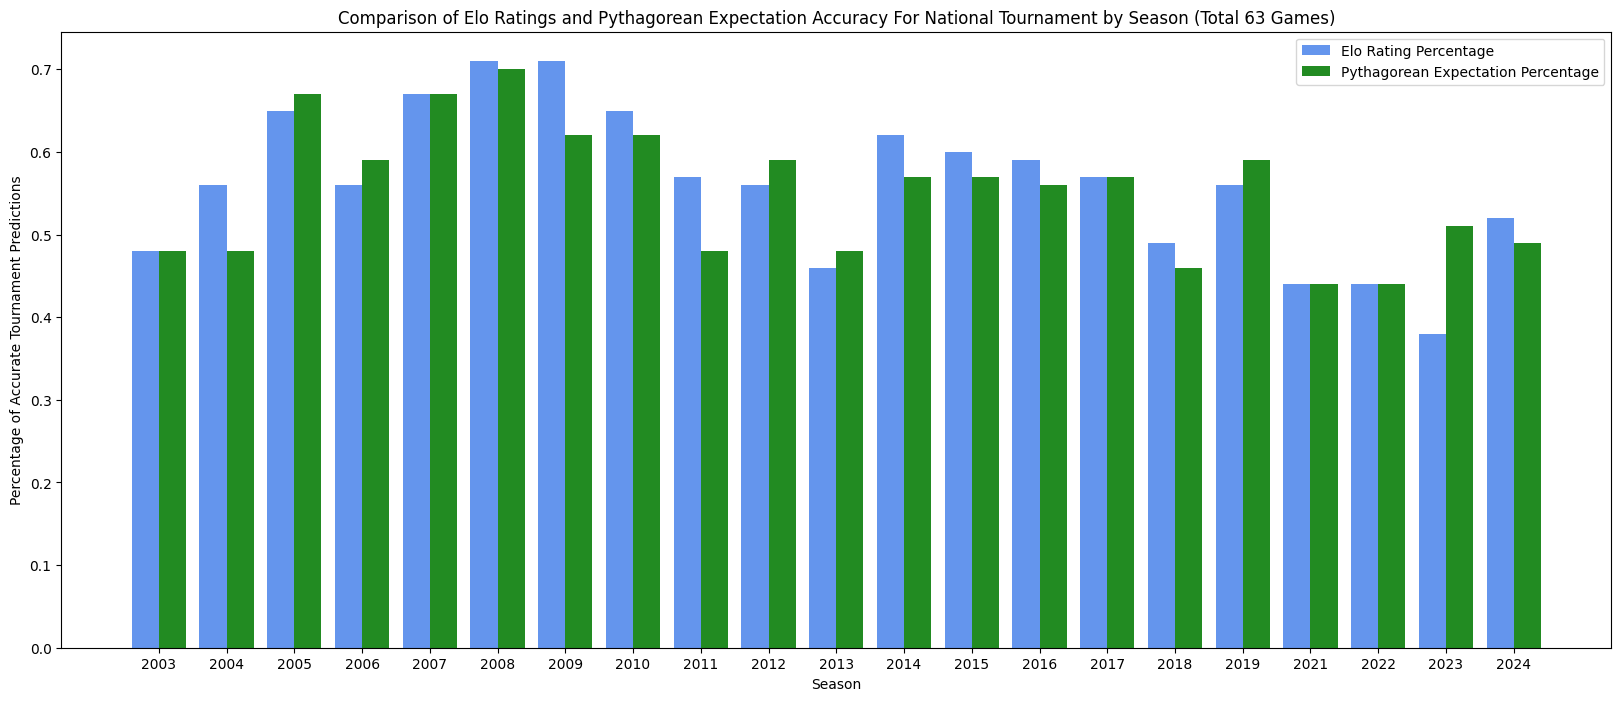

In [463]:
data = {
    "Season": [2024, 2023, 2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003],
    "Elo_Percentage": [0.52, 0.38, 0.44, 0.44, 0.56, 0.49, 0.57, 0.59, 0.60, 0.62, 0.46, 0.56, 0.57, 0.65, 0.71, 0.71, 0.67, 0.56, 0.65, 0.56, 0.48],
    "Pythg_Percentage": [0.49, 0.51, 0.44, 0.44, 0.59, 0.46, 0.57, 0.56, 0.57, 0.57, 0.48, 0.59, 0.48, 0.62, 0.62, 0.70, 0.67, 0.59, 0.67, 0.48, 0.48]
}

# Convert dictionary to DataFrame
# Convert dictionary to DataFrame and sort by 'Season'
df = pd.DataFrame(data).sort_values(by='Season')

# Set the size of the plot
plt.figure(figsize=(20, 8))

# Create a bar plot for Elo_Percentage and Pythg_Percentage side by side
width = 0.4  # the width of the bars
x = df['Season']  # the label locations
ind = range(len(x))  # the x locations for the groups

# Plot data
plt.bar([i - width/2 for i in ind], df['Elo_Percentage'], width, label='Elo Rating Percentage', color='cornflowerblue')
plt.bar([i + width/2 for i in ind], df['Pythg_Percentage'], width, label='Pythagorean Expectation Percentage', color='forestgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Percentage of Accurate Tournament Predictions')
plt.xlabel('Season')
plt.title('Comparison of Elo Ratings and Pythagorean Expectation Accuracy For National Tournament by Season (Total 63 Games)')
plt.xticks(ind, x)
plt.legend()

# Show the plot
plt.show()


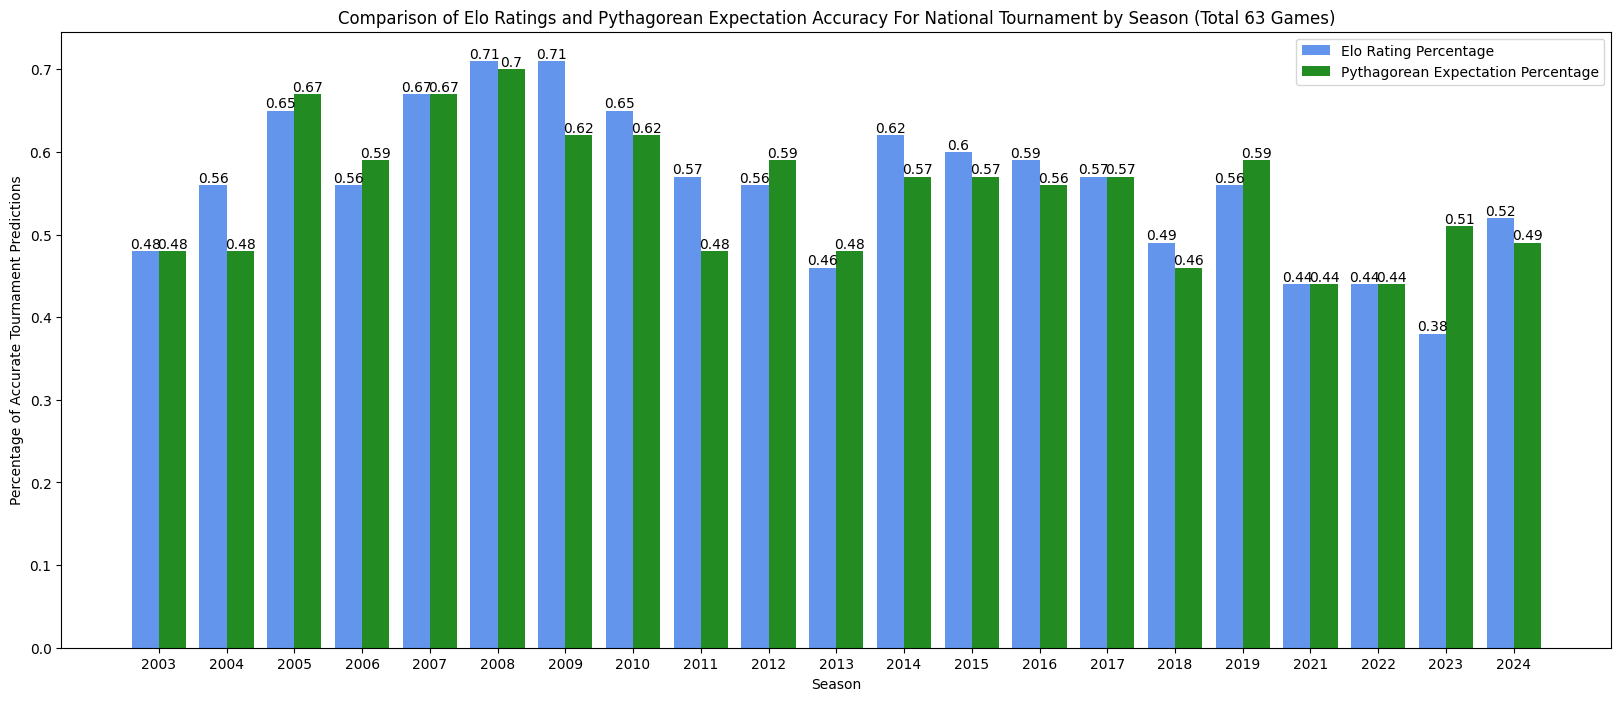

In [465]:
# Convert dictionary to DataFrame and sort by 'Season'
df = pd.DataFrame(data).sort_values(by='Season')

# Set the size of the plot
plt.figure(figsize=(20, 8))

# Create a bar plot for Elo_Percentage and Pythg_Percentage side by side
width = 0.4  # the width of the bars
x = df['Season']  # the label locations
ind = range(len(x))  # the x locations for the groups

# Plot data
bars1 = plt.bar([i - width/2 for i in ind], df['Elo_Percentage'], width, label='Elo Rating Percentage', color='cornflowerblue')
bars2 = plt.bar([i + width/2 for i in ind], df['Pythg_Percentage'], width, label='Pythagorean Expectation Percentage', color='forestgreen')

# Add text labels above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Percentage of Accurate Tournament Predictions')
plt.xlabel('Season')
plt.title('Comparison of Elo Ratings and Pythagorean Expectation Accuracy For National Tournament by Season (Total 63 Games)')
plt.xticks(ind, x)
plt.legend()

# Show the plot
plt.show()